# Prediction using Decision Tree Algorithm

**Aim:** Create the Decision Tree classifier and visualize it graphically.

**Dataset:** https://bit.ly/3kXTdox

**Author:** <a href= 'https://github.com/Devvrat53'>Devvrat Mungekar</a>

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [3]:
df = pd.read_csv("Iris.csv")
df.drop(columns= ['Id'], inplace= True, axis= 1)
df.head(10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
# Checking NULL values
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [6]:
df['Species'].value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: Species, dtype: int64

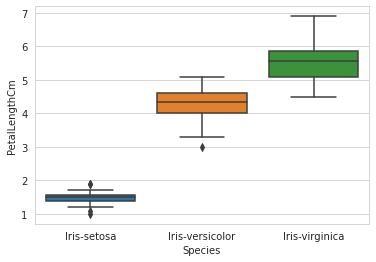

In [7]:
sns.boxplot(x = 'Species', y = 'PetalLengthCm', data = df)
plt.show()

In [8]:
X = df.iloc[:, :4].values
X[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [9]:
y = df['Species'].values
y[:5]

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa'], dtype=object)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state= 2)

In [11]:
dtree = DecisionTreeClassifier(criterion="entropy", max_depth = 4).fit(X_train, y_train)

In [12]:
y_pred = dtree.predict(X_test)
y_pred[:5]

array(['Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-setosa'], dtype=object)

In [13]:
prediction_df = pd.DataFrame({'Original value': y_test, 'Predicted value': y_pred})
prediction_df.head(10)

,Original value,Predicted value
0,Iris-setosa,Iris-setosa
1,Iris-setosa,Iris-setosa
2,Iris-virginica,Iris-virginica
3,Iris-setosa,Iris-setosa
4,Iris-setosa,Iris-setosa
5,Iris-virginica,Iris-versicolor
6,Iris-setosa,Iris-setosa
7,Iris-virginica,Iris-virginica
8,Iris-virginica,Iris-virginica
9,Iris-setosa,Iris-setosa


In [14]:
from sklearn import metrics
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, y_pred))

DecisionTrees's Accuracy:  0.9555555555555556


In [15]:
# Installing Tree library
!pip install pydotplus
!pip install graphviz

In [16]:
from six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree

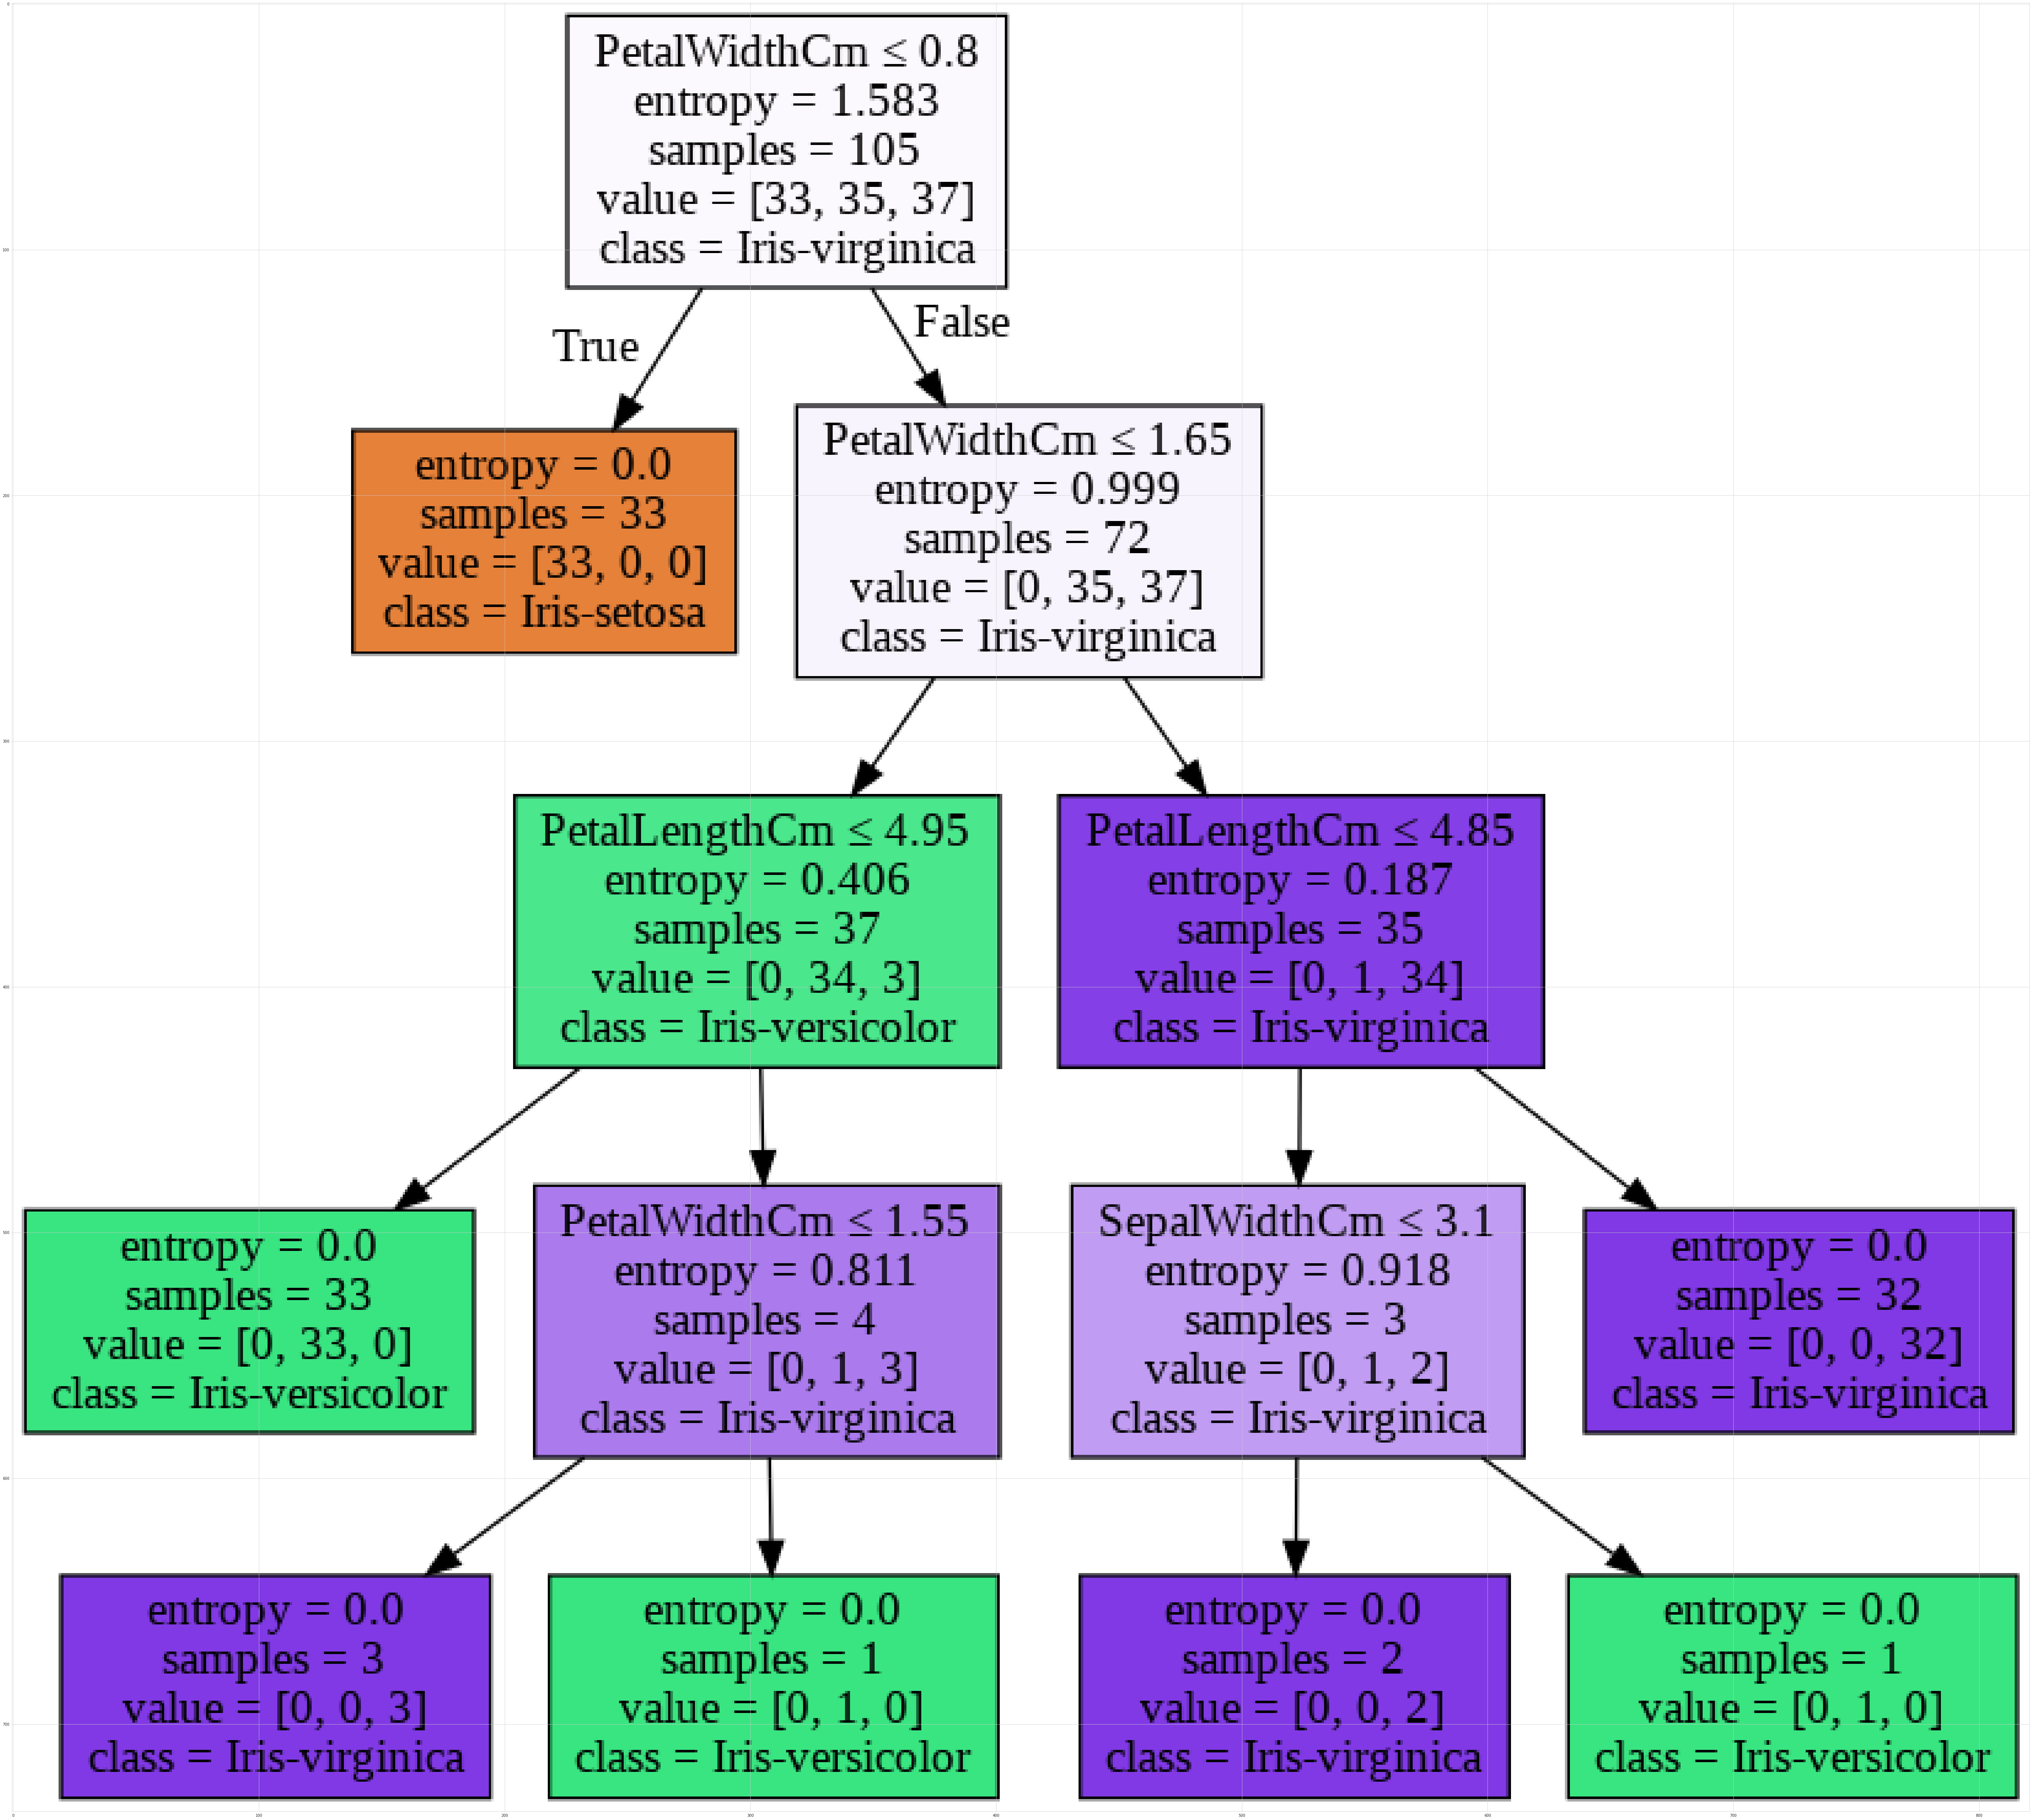

In [17]:
dot_data = StringIO()
filename = "iris.png"
featureNames = df.columns[0:4]
targetNames = df["Species"].unique().tolist()
out=tree.export_graphviz(dtree,feature_names=featureNames, out_file=dot_data, class_names= np.unique(y_train), filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')